In [158]:
import os
import numpy as np
import string
import math

from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [159]:
X_train = [] # an element of X is represented as (filename,text)
Y_train = [] # an element of Y represents the newsgroup category of the corresponding X element
for category in os.listdir('train'):
    for document in os.listdir('train/'+category):
        with open('train/'+category+'/'+document, "r") as f:
            X_train.append((document,f.read()))
            Y_train.append(category)
            
num_category = 2 #Our task is a 2 category classification task           

### Train has 0: rec.autos and 1: talk.politics.guns 
### Test has 0: rec.motorcycles and 1: talk.politics.misc

## Category mapping is 0: Rec and 1:Talk

In [160]:
Y_train

['rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',


In [161]:
X_test = [] # an element of X is represented as (filename,text)
Y_test = [] # an element of Y represents the newsgroup category of the corresponding X element
for category in os.listdir('test'):
    for document in os.listdir('test/'+category):
        with open('test/'+category+'/'+document, "r") as f:
            X_test.append((document,f.read()))
            Y_test.append(category)

In [162]:
Y_test

['rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',


In [163]:
# A list of common english words which should not affect predictions
stopwords = ['those', 'on', 'own', 'yourselves', 'ie', 'around', 'between', 'four', 'been', 'alone', 'off', 'am', 'then', 'other',
             'can', 'cry', 'hereafter', 'front', 'too', 'wherein', 'everything', 'up', 'onto', 'never', 'either', 'how', 'before', 
             'anyway', 'since', 'through', 'amount', 'now', 'he', 'cant', 'was', 'con', 'have', 'into', 'because', 'inc', 'not', 
             'therefore', 'they', 'even', 'whom', 'it', 'see', 'somewhere', 'interest', 'thereupon', 'nothing', 'thick', 'whereas', 
             'much', 'whenever', 'find', 'seem', 'until', 'whereby', 'at', 'ltd', 'fire', 'also', 'some', 'last', 'than', 'get', 
             'already', 'our', 'once', 'will', 'noone', 'that', 'what', 'thus', 'no', 'myself', 'out', 'next', 'whatever', 'although', 
             'though', 'etc', 'which', 'would', 'therein', 'nor', 'somehow', 'whereupon', 'besides', 'whoever', 'thin', 'ourselves', 
             'few', 'third', 'without', 'anything', 'twelve', 'against', 'while', 'twenty', 'if', 'however', 'found', 'herself', 
             'when', 'may', 'ours', 'six', 'done', 'seems', 'else', 'call', 'perhaps', 'had', 'nevertheless', 'fill', 'where', 
             'otherwise', 'still', 'within', 'its', 'for', 'together', 'elsewhere', 'throughout', 'of', 'eg', 'others', 'show', 
             'sincere', 'anywhere', 'anyhow', 'as', 'are', 'the', 'hence', 'something', 'hereby', 'nowhere', 'de', 'latterly', 
             'neither', 'his', 'go', 'forty', 'put', 'their', 'by', 'namely', 'could', 'five', 'itself', 'is', 'nine', 'whereafter', 
             'down', 'bottom', 'thereby', 'such', 'both', 'she', 'become', 'whole', 'who', 'yourself', 'every', 'thru', 'except', 
             'very', 'several', 'among', 'being', 'be', 'mine', 'further', 'here', 'during', 'why', 'with', 'becomes', 'about', 
             'a', 'co', 'seeming', 'due', 'wherever', 'beforehand', 'detail', 'fifty', 'becoming', 'might', 'amongst', 'my', 'empty', 
             'thence', 'thereafter', 'almost', 'least', 'someone', 'often', 'from', 'keep', 'him', 'or', 'top', 'her', 'nobody',
             'sometime', 'across', 'hundred', 'only', 'via', 'name', 'eight', 'three', 'back', 'to', 'all', 'became', 'move', 'me', 
             'we', 'formerly', 'so', 'i', 'whence', 'describe', 'under', 'always', 'himself', 'in', 'herein', 'more', 'after', 
             'themselves', 'you', 'above', 'sixty', 'them', 'hasnt', 'your', 'made', 'indeed', 'most', 'everywhere', 'fifteen', 
             'but', 'must', 'along', 'beside', 'hers', 'side', 'former', 'anyone', 'full', 'has', 'yours', 'whose', 'behind', 
             'please', 'amoungst', 'mill', 'ten', 'seemed', 'sometimes', 'should', 'over', 'take', 'each', 'same', 'rather', 'latter',
             'and', 'hereupon', 'part', 'per', 'eleven', 'ever', 'enough', 'again', 'us', 'yet', 'moreover', 'mostly', 'one', 'meanwhile',
             'whither', 'there', 'toward', 'give', 'system', 'do', 'an', 'these', 'everyone', 'towards', 'this', 'bill', 'cannot', 'un', 
             'afterwards', 'beyond', 'were', 'whether', 'well', 'another', 'below', 'first', 'upon', 'any', 'none', 'many', 'serious', 
             're', 'two', 'couldnt', 'less''a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost','alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

## Building a vocabulary of words from the given documents

In [164]:
vocab = {}    #dictionary with unique words (key) and their freq (value)
for i in range(len(X_train)):   #ith document
    word_list = []
    for word in X_train[i][1].split():   #X_train[i][0] has file no.
        word_new  = word.strip(string.punctuation).lower()   #strip(..) removes punctuation characters from beginning and end
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1            

### Plotting a graph of no of words with a given frequency to decide cutoff drequency

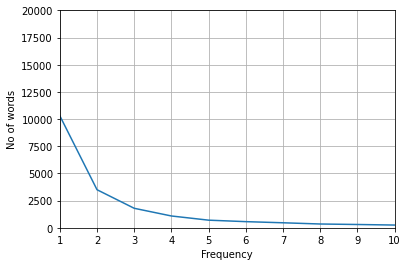

In [165]:
num_words = [0 for i in range(max(vocab.values())+1)]  # i goes till it covers all frequenicies till most freq word, num_words is a list of all possible freq
freq = [i for i in range(max(vocab.values())+1)]       # x axis
total_words = 0

for key in vocab:
    num_words[vocab[key]]+=1  # num_words[with this freq] = ? how much
    
for i in range (len(num_words)):
    total_words += num_words[i]
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")  #no of words with each freq
plt.grid()
plt.show()

In [166]:
cutoff_freq = 150
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(150) : 102


### Words with frequency higher than cutoff frequency are chosen as features

In [167]:
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [168]:
features

['subject',
 'organization',
 'computer',
 'lines',
 'article',
 'writes',
 'like',
 'state',
 'problem',
 'people',
 'make',
 'car',
 'think',
 'cars',
 "don't",
 'point',
 'dealer',
 'thing',
 'believe',
 'time',
 'sure',
 'buy',
 "it's",
 'say',
 'really',
 'better',
 'university',
 'usa',
 'got',
 'want',
 'know',
 'drive',
 'nntp-posting-host',
 'years',
 'course',
 "i've",
 'far',
 'good',
 'going',
 "doesn't",
 'away',
 "i'm",
 'new',
 "i'd",
 'second',
 'things',
 'question',
 'texas',
 'oil',
 'way',
 'work',
 'engine',
 'great',
 'power',
 'look',
 'right',
 "can't",
 "that's",
 'day',
 'read',
 'distribution',
 'said',
 'reply-to',
 'year',
 'world',
 'long',
 'little',
 'gun',
 'used',
 "you're",
 'case',
 'john',
 'use',
 'david',
 "didn't",
 'need',
 'jim',
 'american',
 'come',
 'government',
 'public',
 'safety',
 'number',
 'country',
 'states',
 'national',
 'group',
 'law',
 'police',
 'rights',
 'control',
 'amendment',
 'fbi',
 'file',
 'waco',
 'weapons',
 'batf',

In [169]:
# To represent training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
#     print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1   

In [170]:
X_train_dataset

array([[ 2.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1.,  0., ..., 11.,  0.,  0.],
       [ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  1.,  0., ...,  2.,  0.,  0.]])

In [171]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [172]:
X_test_dataset

array([[1., 1., 0., ..., 0., 0., 0.],
       [3., 2., 8., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 2., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [173]:
Y_train_dataset = np.zeros(len(Y_train))
for i in range(len(Y_train)):
    if(Y_train[i].find("talk")):
        Y_train_dataset[i] = 1
        
Y_test_dataset = np.zeros(len(Y_test))
for i in range(len(Y_test)):
    if(Y_test[i].find("talk")):
        Y_test_dataset[i] = 1

### Evaluating on Traditional Naive Bayes Classifier Method

In [174]:
# Implementing Multinomial Naive Bayes from scratch
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

In [175]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Our score on testing data : 0.729068673565381
Classification report for testing data :-
              precision    recall  f1-score   support

         rec       0.69      0.93      0.79       598
        talk       0.84      0.47      0.60       465

    accuracy                           0.73      1063
   macro avg       0.77      0.70      0.70      1063
weighted avg       0.76      0.73      0.71      1063



In [176]:
Y_test_pred

['rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'talk',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 

In [177]:
Y_test

['rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',
 'rec',


### Evaluating on the proposed NBTC algorithm

In [178]:
#Defining KL divergence between two numpy arrays
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)
    return np.sum(np.where(b!=0, a * np.log(a / b), 0))

In [179]:
X_train_dataset

array([[ 2.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1.,  0., ..., 11.,  0.,  0.],
       [ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  1.,  0., ...,  2.,  0.,  0.]])

In [180]:
p1 = []
tot_sum,count = 0,0
for i in range(len(X_train_dataset[0])):
    count = 0
    for j in range(len(X_train_dataset)):
        count += X_train_dataset[j][i]
    p1.append(count)
         
for i in range(len(p1)):
    tot_sum += p1[i]

for i in range(len(p1)):
    p1[i] = p1[i]/tot_sum
        
print(p1)

[0.038400406891728654, 0.03598448725284506, 0.005086146608175981, 0.03716065865598576, 0.029086400915506388, 0.03150232055438998, 0.022061160912963316, 0.010013351134846462, 0.006929874753639774, 0.025589675122385403, 0.011221310954288258, 0.02876851675249539, 0.017515417381906033, 0.012270328692224554, 0.02320554389980291, 0.007057028418844173, 0.004768262445164982, 0.007088816835145273, 0.008646449233899168, 0.014241210502892745, 0.005912645432004577, 0.0053404539385847796, 0.013827961090978447, 0.008996121813211265, 0.008964333396910166, 0.0074702778307584716, 0.016529976476571936, 0.01055375421196516, 0.006262318011316676, 0.00801068090787717, 0.014145845253989446, 0.005086146608175981, 0.017451840549303835, 0.006071587513510077, 0.005117935024477081, 0.006230529595015576, 0.005022569775573781, 0.015353805073431242, 0.006993451586241974, 0.005531184436391379, 0.005022569775573781, 0.014209422086591646, 0.011157734121686058, 0.004768262445164982, 0.004927204526670482, 0.007088816835

In [181]:
p2 = []
tot_sum2,count2 = 0,0
for i in range(len(X_test_dataset[0])):
    count2 = 0
    for j in range(len(X_test_dataset)):
        count2 += X_test_dataset[j][i]
    p2.append(count2)
         
for i in range(len(p2)):
    tot_sum2 += p2[i]

for i in range(len(p2)):
    p2[i] = p2[i]/tot_sum2
        
print(p2)

[0.0435980168411112, 0.04281104902809475, 0.00413158101833635, 0.04277170063744393, 0.04048949397969623, 0.04383410718501613, 0.025851892657590303, 0.01255213661761234, 0.006059652160226647, 0.03088848666089557, 0.017234595105060202, 0.0037380971118281263, 0.024396002203509876, 0.0011804517195246715, 0.02955064137876761, 0.007476194223656253, 0.0006295742504131581, 0.008538600771228456, 0.008184465255371056, 0.016368930510742112, 0.00873534272448257, 0.003265916424018258, 0.025537105532383725, 0.012198001101754938, 0.00991579444400724, 0.005548123081765955, 0.016723066026599512, 0.00794837491146612, 0.008892736287085859, 0.013142362477374676, 0.023412292437239315, 0.002046116313842764, 0.01967419532541119, 0.008381207208625167, 0.005626819863067601, 0.008577949161879279, 0.006099000550877469, 0.014676949712756748, 0.017116549933107735, 0.005980955378925002, 0.0037380971118281263, 0.017234595105060202, 0.02065790509168175, 0.005075942393956087, 0.0031478712520657906, 0.00641378767608404

In [182]:
kl_div = KL(p1, p2)
print(kl_div)

0.31565708427511824


C:\Users\Akshay\AppData\Local\Temp\ipykernel_30692\4104319533.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
C:\Users\Akshay\AppData\Local\Temp\ipykernel_30692\4104319533.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


The KL divergence between train and test data is around 0.315

In [183]:
#Using the empirical relation between KL divergence and gamma to find gamma value for a given KL divergence value
gamma = 0.042*(math.pow(kl_div, -2.276))

In [184]:
gamma

0.5794750210698527

In [185]:
PDu_Dl_ = gamma/(1+gamma)
PDu_Du_ = 1 - PDu_Dl_

In [186]:
PDu_Dl_

0.36687824330222524

### Algorithm 1 as given in the paper

In [187]:
def Algo1():
    # Every element is ith iteration of this
    # Every element has C sub_elements for each class 'c'
    # Every sub_element has sub_sub_element for every document 'd'
    
    c1 = 0
    for i in Y_train_dataset:
        if(i == 1):
            c1+=1

    p1 = c1/len(Y_train_dataset)
    p0 = 1-p1
    
    T = 10  # Number of times we run the loop, more is T, more accurate will be the model
    PDu_cId =[[[0 for j in range(2)] for k in range(len(X_train_dataset))] for i in range(T+1)] # 0th iteration value 0 (lets say)
    PDu_wIc = [[[0 for k in range(len(features))] for j in range(2)] for i in range(T+1)] # ith iteration, jth class, kth word
    PDu_c = [[0 for j in range(2)] for i in range(T+1)]   # ith iteration, jth class
    PDu_d = [[1/len(X_train_dataset) for j in range(len(X_train_dataset))] for i in range(T+1)]   # ith iteration, jth document
    
    PDu_cIDu = [[0 for j in range(2)] for i in range(T+1)]
    PDu_cIDl = [[0 for j in range(2)] for i in range(T+1)]
    nDu_w_c_Dl = [[0 for i in range(len(features))] for j in range(2)]
    nDu_w_c_Du = [[0 for i in range(len(features))] for j in range(2)]
    nDu_c_Dl = [0 for i in range(2)]
    nDu_c_Du = [0 for i in range(2)]
    
    PDu_wIc_Dl = [[0 for j in range(2)] for i in range(len(features))]
    PDu_wIc_Du = [[0 for j in range(2)] for i in range(len(features))]
    
    PDu_Du = []
    
    PDu_Dl = []
    #initializing for 0th Iteration using traditional naive bayes classifier
    PDu_c[0][0] = p0
    PDu_c[0][1] = p1
    
    
    nDu_w_c = [[0 for i in range(len(features))] for j in range(2)]
    nC = [0 for i in range(2)]
    for w in range(len(features)):
        for c in range(num_category):
            for d in range(len(X_train_dataset)):  #We estimate PDu(.) using PDl(.) by traditional naive bayes
                if(Y_train_dataset[d] == c):
                    nDu_w_c[c][w] += X_train_dataset[d][w]
                    nC[c] += 1
    
#     print(nDu_w_c)
#     print(nC)
    
    for c in range(num_category):
        for w in range(len(features)):
            PDu_wIc[0][c][w] = (1+nDu_w_c[c][w])/(len(features)+nC[c])

#     print(PDu_wIc[0])
#     print(PDu_c[0])
#     print(PDu_d)

    for t in range(1,T+1):
        # Start for Eqn 6
        print(t)
        for c in range(num_category):
            for d in range(len(X_test_dataset)):
                val1 = PDu_c[t-1][c]
                for w in range(len(X_test_dataset[d])):
                    if(X_test_dataset[d][w] > 0 and Y_test_dataset[d] == c): 
                        val1 *= PDu_wIc[t-1][c][w]
                PDu_cId[t][d][c] = val1
                
        # End for Eqn 6
        for c in range(num_category):
            # Start for Eqn 7
            #Eqn 9 start               
            for d in range (len(X_train_dataset)):
                PDu_cIDu[t][c] += PDu_cId[t][d][c]*(1/len(X_train_dataset))  #doubt

            for d in range (len(X_test_dataset)):
                PDu_cIDl[t][c] += PDu_cId[t][d][c]*(1/len(X_test_dataset))   #doubt
            #Eqn 9 end

            PDu_c[t][c] = PDu_Du_*PDu_cIDu[t][c] + PDu_Dl_*PDu_cIDl[t][c]   #PDu_Du_ is tot prob for all classes c's
            # End for Eqn 7

            #Eqn 11 start
            for w in range(len(features)):
                for c in range(num_category):
                    for d in range(len(X_train_dataset)):
                        nDu_w_c_Dl[c][w] += np.sum(X_train_dataset[d])*(X_train_dataset[d][w]/np.sum(X_train_dataset[d]))*PDu_cId[t][d][c]
                    for d in range(len(X_test_dataset)):
                        nDu_w_c_Du[c][w] += np.sum(X_test_dataset[d])*(X_test_dataset[d][w]/np.sum(X_test_dataset[d]))*PDu_cId[t][d][c]
            #Eqn 11 end


            #Eqn 12 start
            for d in range (len(X_train_dataset)):
                nDu_c_Dl[c] += np.sum(X_train_dataset[d])*PDu_cId[t][d][c]

            for d in range (len(X_test_dataset)):
                nDu_c_Du[c] += np.sum(X_train_dataset[d])*PDu_cId[t][d][c]
            #Eqn 12 end

            #Eqn 10 start
            for w in range(len(features)):
                for c in range(num_category):
                    PDu_wIc_Dl[w][c] = (1+nDu_w_c_Dl[c][w])/(len(features)+nDu_c_Dl[c])
                    PDu_wIc_Du[w][c] = (1+nDu_w_c_Du[c][w])/(len(features)+nDu_c_Du[c])
            #Eqn 10 end

            #Eqn 8 start
            for w in range(len(features)):
                PDu_wIc[t][c][w] = PDu_Du_*PDu_cIDu[t][c]*PDu_wIc_Du[w][c] + PDu_Dl_*PDu_cIDl[t][c]*PDu_wIc_Dl[w][c]
            #Eqn 8 end
    return PDu_cId[T]

In [188]:
X_train_dataset

array([[ 2.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1.,  0., ..., 11.,  0.,  0.],
       [ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  1.,  0., ...,  2.,  0.,  0.]])

### Algorithm 2 as given in the paper

In [189]:
def Algo2():
    kl_div = KL(p1, p2)
    gamma = 0.042*(math.pow(kl_div, -2.276))
    PDu_Dl_ = gamma/(1+gamma)
    PDu_Du_ = 1 - PDu_Dl_
    ans = [[0 for j in range(2)] for k in range(len(X_train_dataset))]
    ans = Algo1()
    return ans

In [190]:
pred = Algo2()

C:\Users\Akshay\AppData\Local\Temp\ipykernel_30692\4104319533.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
C:\Users\Akshay\AppData\Local\Temp\ipykernel_30692\4104319533.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


1
2
3
4
5
6
7
8
9
10


In [195]:
pred

[[0.001823779675590493, 8.169932909896789e-76],
 [0.001823779675590493, 0.0],
 [0.001823779675590493, 3.5948630814737814e-141],
 [0.001823779675590493, 6.826045387516491e-71],
 [0.001823779675590493, 1.9315938709015657e-65],
 [0.001823779675590493, 7.468504096101545e-112],
 [0.001823779675590493, 2.8790667523352052e-64],
 [0.001823779675590493, 1.306813875316963e-97],
 [0.001823779675590493, 5.1074094261495675e-110],
 [0.001823779675590493, 4.409334548612805e-125],
 [0.001823779675590493, 1.0625166944470078e-110],
 [0.001823779675590493, 1.1677709188645831e-81],
 [0.001823779675590493, 8.438083992668109e-92],
 [0.001823779675590493, 1.519979071899383e-76],
 [0.001823779675590493, 4.7515865102719276e-98],
 [0.001823779675590493, 5.034963056393975e-64],
 [0.001823779675590493, 1.3648657502468647e-58],
 [0.001823779675590493, 5.190287936316064e-31],
 [0.001823779675590493, 1.1682626873027378e-86],
 [0.001823779675590493, 8.471905947404648e-58],
 [0.001823779675590493, 6.728370146500227e-8

In [191]:
Y_pred_algo = []
for i in range(len(pred)):
    if(pred[i][0] > pred[i][1]):
        Y_pred_algo.append(0)
    else:
        Y_pred_algo.append(1)

In [192]:
Y_test_dataset

array([1., 1., 1., ..., 0., 0., 0.])

In [193]:
Y_pred_algo

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [194]:
pred_count = 0
for i in range(len(X_test_dataset)):
    if(Y_test_dataset[i] == Y_pred_algo[i]):
        pred_count += 1
        
print(pred_count/len(X_test_dataset))

0.0
